<a href="https://colab.research.google.com/github/jeremymcwilliams/python-dataviz-fti2021/blob/main/FTI2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualizations with python
## FTI 2021

### Goals of this workshop:  

* Load and filter datasets as needed using pandas
* Learn the basic elements of creating plots with pandas and matplotlib
* Repeat!

Note: the exercises here may be strikingly similar to the FTI "Data Visualizations with R" workshop.



---



Welcome to "Data Visualizations with python". We'll use this notebook to go through some examples, and then do some practice problems. 

This notebook is a mix of text cells and code cells. The text is simply descriptive of what we're doing, but the code cells let you write and execute python code. Below is an example of a code cell. To run the cell, click the 'play' icon on its left edge:


In [ ]:
x=5
print(x)

Now use the blank code cell below to create a variable 'y' and set it equal to 20, and print it:

In [ ]:
#enter your code below




As you examine the code blocks below, you'll want to make sure you run them. The code in this notebook is "procedural", meaning that it reads top to bottom. So a code block later in the notebook may not run properly if a preceding block isn't executed.

Ok! Now on to data visualizations. Before getting started, it's worth noting that python (and other languages) offers more than one way to work with data and create visualizations. If you ultimately want to try some different approaches, Google searches will undoubtedly lead you there. For the purposes of this session, we're going to use the "matplotlib" package.

We're going to take this general approach:

* Load a dataset
* Filter or format the data we want to use
* Create the visualization
* Edit as necessary
* Save the visualization as an image file
Before doing anything too fancy, we're going to first load some python libraries. Python out of the box can do a lot, but it can't do everything. Fortunately we can import libraries of functions created by the open source community to make our coding easier. The syntax to import a library is:

```
import libraryName as abbreviation
```
...where "abbreviation" is typically a very short word or acronymn that can be used later in our code to call functions in that library...basically to save a few keystrokes.

In [1]:
#pandas is a data analysis library
import pandas as pd

#pandas uses matplotlib "under the hood" to generate visualizations
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

### Average Height by Country

In our github repository, we've made a couple datasets available that we'll load. The first is "average-height-of-men.csv". This is a dataset from NCD-Risc (http://www.ncdrisc.org/data-downloads.html) that has the average annual height of men by country from 1896-1996. Let's load this data below by createing a variable called "men". We can then take a look at the data by printing "men".

In [2]:
men_url="https://raw.githubusercontent.com/jeremymcwilliams/python-dataviz-fti2021/main/average-height-of-men.csv"

# loads the data into the 'menDataFrame' variable
menDataFrame = pd.read_csv(men_url)

menDataFrame.head()



,Entity,Code,Year,Mean male height (cm) (centimeters)
0,Afghanistan,AFG,1896,161.164095
1,Afghanistan,AFG,1897,161.196286
2,Afghanistan,AFG,1898,161.228297
3,Afghanistan,AFG,1899,161.260727
4,Afghanistan,AFG,1900,161.293068


This looks pretty straightforward, though that last column heading is a bit of a handful. Let's use the pandas "columns" function to rename a couple:

In [3]:

menDataFrame.columns=['Country', 'Code', 'Year', 'Height']

menDataFrame.head()

,Country,Code,Year,Height
0,Afghanistan,AFG,1896,161.164095
1,Afghanistan,AFG,1897,161.196286
2,Afghanistan,AFG,1898,161.228297
3,Afghanistan,AFG,1899,161.260727
4,Afghanistan,AFG,1900,161.293068


Let's say we're interested in seeing any changes over time in the average height of men from the United States. We can use a pandas filtering expression:

In [4]:

usMen=menDataFrame[menDataFrame.Code.eq('USA')]

print(usMen)



             Country Code  Year      Height
19998  United States  USA  1896  171.079272
19999  United States  USA  1897  171.179657
20000  United States  USA  1898  171.280292
20001  United States  USA  1899  171.381148
20002  United States  USA  1900  171.482114
...              ...  ...   ...         ...
20094  United States  USA  1992  177.243253
20095  United States  USA  1993  177.214932
20096  United States  USA  1994  177.186675
20097  United States  USA  1995  177.158675
20098  United States  USA  1996  177.130396

[101 rows x 4 columns]


Now that we have a subset of data, let's create a line plot:

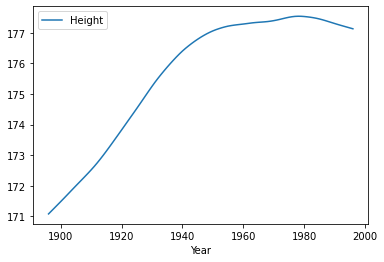

In [5]:
usMen.plot(x="Year", y="Height")

# We rely on the matplotlib library (plt) to display the plot
plt.show()

Now let's compare multiple countries at once. We can use the "or" operater | in the filter function to return data for multiple countries:

In [6]:
# create a list of countries
countries = ['Kenya','Spain', 'Chile']

# create a 
menCaMxUs = menDataFrame[menDataFrame.Country.isin(countries)]

print(menCaMxUs)



      Country Code  Year      Height
3636    Chile  CHL  1896  160.694096
3637    Chile  CHL  1897  160.813150
3638    Chile  CHL  1898  160.932001
3639    Chile  CHL  1899  161.050861
3640    Chile  CHL  1900  161.169987
...       ...  ...   ...         ...
17468   Spain  ESP  1992  176.407426
17469   Spain  ESP  1993  176.454200
17470   Spain  ESP  1994  176.500812
17471   Spain  ESP  1995  176.547360
17472   Spain  ESP  1996  176.593867

[303 rows x 4 columns]


Now let's plot them:

Country       Chile       Kenya       Spain
Year                                       
1896     160.694096  165.720072  162.290259
1897     160.813150  165.822694  162.373685
1898     160.932001  165.925263  162.457372
1899     161.050861  166.028116  162.541389
1900     161.169987  166.131098  162.625339
...             ...         ...         ...
1992     171.614274  170.322888  176.407426
1993     171.663504  170.151851  176.454200
1994     171.713024  169.980804  176.500812
1995     171.762088  169.810517  176.547360
1996     171.811282  169.640092  176.593867

[101 rows x 3 columns]


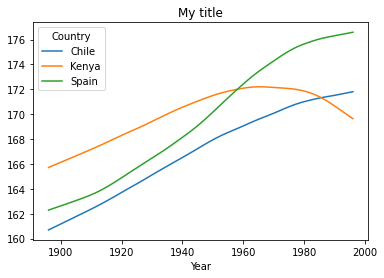

In [11]:
#menCaMxUs.plot(x="Year", y="Height")

df = menCaMxUs.pivot(index='Year', columns='Country', values='Height')
print(df)
df.plot(title="My title")

#menCaMxUs.set_index('Year', inplace=True)
#menCaMxUs.groupby('Code')['Height'].plot(legend=True)

plt.show()
